<a href="https://colab.research.google.com/github/pykeen/pykeen/blob/master/notebooks/results_plots/results_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Results Plotting Demo

This notebook serves to make some simple plots of the 1) losses and 2) entities and relations following training with the PyKEEN pipeline.

In [1]:
! python -c "import pykeen" || pip install git+https://github.com/pykeen/pykeen.git

In [2]:
import os

import numpy as np
from matplotlib import pyplot as plt

import pykeen
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
pykeen.env()

Key,Value
OS,posix
Platform,Darwin
Release,23.5.0
Time,Fri Aug 9 10:55:44 2024
Python,3.12.4
PyKEEN,1.10.3-dev
PyKEEN Hash,6f7c83ba
PyKEEN Branch,snekpackify
PyTorch,2.3.1
CUDA Available?,false


## Toy Example

Following the disussions proposed in https://github.com/pykeen/pykeen/issues/97, a very small set of triples are trained and visualized.

In [4]:
os.makedirs("results", exist_ok=True)

triples = """
Brussels	locatedIn	Belgium
Belgium	partOf	EU
EU	hasCapital	Brussels
""".strip()

triples = np.array([triple.split("\t") for triple in triples.split("\n")])
tf = TriplesFactory.from_labeled_triples(triples=triples)

Training with default arguments

Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.01s seconds


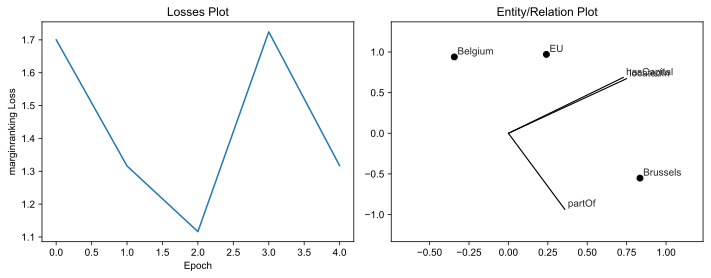

In [5]:
results = pipeline(
    training=tf,
    testing=tf,
    model="TransE",
    model_kwargs={"embedding_dim": 2},
    training_kwargs={"use_tqdm_batch": False},
    evaluation_kwargs={"use_tqdm": False},
    random_seed=1,
    device="cpu",
)
results.plot(er_kwargs={"plot_relations": True})
plt.savefig("results/toy_1.png", dpi=300)

Training with slower learning and more epochs

INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/128 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.01s seconds


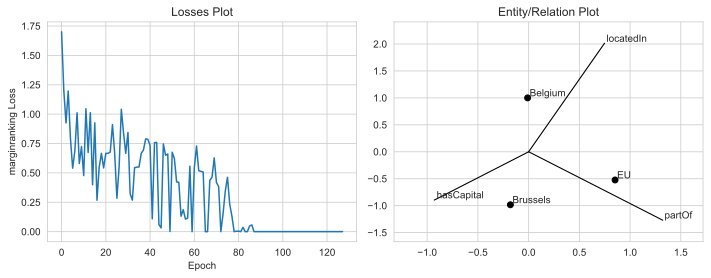

In [6]:
results = pipeline(
    training=tf,
    testing=tf,
    model="TransE",
    model_kwargs={"embedding_dim": 2},
    optimizer_kwargs={"lr": 1.0e-1},
    training_kwargs={"num_epochs": 128, "use_tqdm_batch": False},
    evaluation_kwargs={"use_tqdm": False},
    random_seed=1,
    device="cpu",
)
results.plot(er_kwargs={"plot_relations": True})
plt.savefig("results/toy_2.png", dpi=300)

Training with appropriate softplus

In [7]:
toy_results = pipeline(
    training=tf,
    testing=tf,
    model="TransE",
    loss="softplus",
    model_kwargs={"embedding_dim": 2},
    optimizer_kwargs={"lr": 1.0e-1},
    training_kwargs={"num_epochs": 128, "use_tqdm_batch": False},
    evaluation_kwargs={"use_tqdm": False},
    random_seed=1,
    device="cpu",
)

INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/128 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.01s seconds


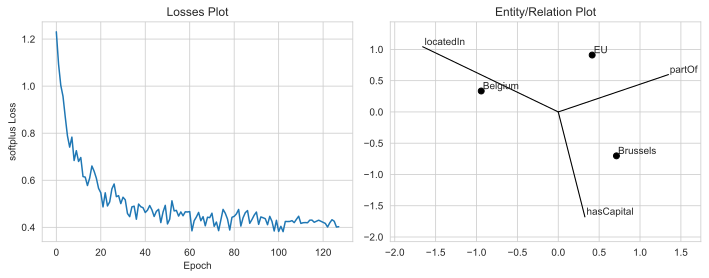

In [8]:
toy_results.plot(er_kwargs={"plot_relations": True})
plt.savefig("results/toy_3.png", dpi=300)

## Benchmark Dataset Example

In [9]:
nations_results = pipeline(
    dataset="Nations",
    model="TransE",
    model_kwargs={"embedding_dim": 8},
    optimizer_kwargs={"lr": 1.0e-1},
    training_kwargs={"num_epochs": 80, "use_tqdm_batch": False},
    evaluation_kwargs={"use_tqdm": False},
    random_seed=1,
    device="cpu",
)

INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///Users/cthoyt/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///Users/cthoyt/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///Users/cthoyt/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.triples.triples_factory:Loading from file:///Users/cthoyt/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/validation
INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/80 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.01s seconds


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>,
        <Axes: title={'center': 'Entity/Relation Plot using PCA'}>],
       dtype=object))

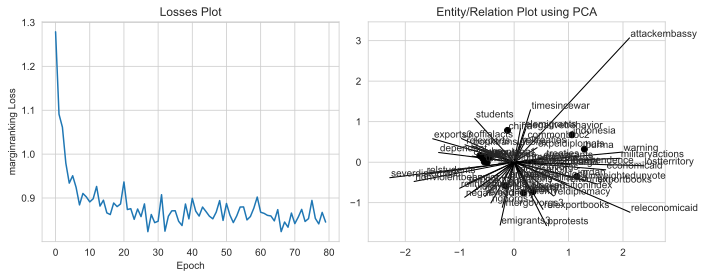

In [10]:
nations_results.plot(er_kwargs={"plot_relations": True})

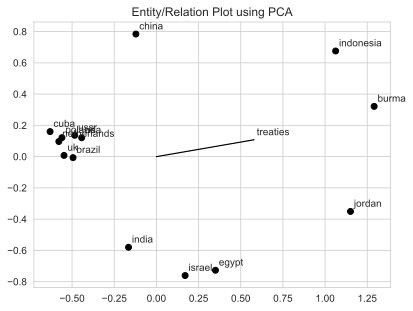

In [11]:
# Filter the ER plot down to a specific set of entities and relations
nations_results.plot_er(
    relations={"treaties"},
    apply_limits=False,
    plot_relations=True,
);